In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
matches_df = pd.read_csv('Dataset/matches.csv')
match_details = pd.read_csv('Dataset/deliveries.csv')

# Insights of 1st Innings for a match
## Step 1: Loading the Data

In [24]:
matches_df.head()

,id,year,date,winner,result,win_by_runs,win_by_wickets,player_of_match,team1,team2,toss_winner,toss_decision,umpire1,umpire2,venue
0,1,2017,2017-01-13,Australia,normal,92.0,NaN,MS Wade,Australia,Pakistan,Australia,bat,MD Martell,C Shamshuddin,"Brisbane Cricket Ground, Woolloongabba"
1,2,2017,2017-01-15,Pakistan,normal,NaN,6.0,Mohammad Hafeez,Australia,Pakistan,Australia,bat,CB Gaffaney,P Wilson,Melbourne Cricket Ground
2,3,2017,2017-01-19,Australia,normal,NaN,7.0,SPD Smith,Australia,Pakistan,Australia,field,SD Fry,C Shamshuddin,Western Australia Cricket Association Ground
3,4,2017,2017-01-22,Australia,normal,86.0,NaN,DA Warner,Australia,Pakistan,Australia,bat,CB Gaffaney,MD Martell,Sydney Cricket Ground
4,5,2017,2017-01-26,Australia,normal,57.0,NaN,DA Warner,Australia,Pakistan,Australia,bat,SD Fry,C Shamshuddin,Adelaide Oval


In [14]:
match_details.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total,player_dismissed,dismissal_kind,fielder
0,1,1,Australia,Pakistan,1,1,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Australia,Pakistan,1,2,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Australia,Pakistan,1,3,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,1,Australia,Pakistan,1,4,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Australia,Pakistan,1,5,DA Warner,TM Head,Mohammad Amir,1,0,0,0,0,1,1,NaN,NaN,NaN


In [22]:
# Selecting the 1st match AUG vs PAK and the 1st inning of the match
match1 = match_details[match_details.match_id == 1]
match1_1st = match1[match1.inning == 1]

In [23]:
# 1st inning of the AUG vs PAK match
match1_1st

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total,player_dismissed,dismissal_kind,fielder
0,1,1,Australia,Pakistan,1,1,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Australia,Pakistan,1,2,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Australia,Pakistan,1,3,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,1,Australia,Pakistan,1,4,DA Warner,TM Head,Mohammad Amir,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Australia,Pakistan,1,5,DA Warner,TM Head,Mohammad Amir,1,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1,1,Australia,Pakistan,50,2,MS Wade,B Stanlake,Hasan Ali,0,0,0,0,4,0,4,NaN,NaN,NaN
306,1,1,Australia,Pakistan,50,3,MS Wade,B Stanlake,Hasan Ali,0,0,0,0,0,0,0,NaN,NaN,NaN
307,1,1,Australia,Pakistan,50,4,MS Wade,B Stanlake,Hasan Ali,0,0,0,0,0,0,0,NaN,NaN,NaN
308,1,1,Australia,Pakistan,50,5,MS Wade,B Stanlake,Hasan Ali,0,0,0,0,2,0,2,NaN,NaN,NaN


### Observation on the data
* Australia is the batting in the 1st innings
* Pakisthan is bowling
* Opening Batsmen are DA Warner and TM Head
* 1st Bowler is Mohammad Amir

### Important Insight
There are **310 rows** in this dataset, A one innings have only **300 balls(50 overs)**<br>
So, **the extra 10 balls must be wide or no balls**<br>

In [27]:
# Overall Overview of the match
matches_df.iloc[0]

id                                                      1
year                                                 2017
date                                           2017-01-13
winner                                          Australia
result                                             normal
win_by_runs                                            92
win_by_wickets                                        NaN
player_of_match                                   MS Wade
team1                                           Australia
team2                                            Pakistan
toss_winner                                     Australia
toss_decision                                         bat
umpire1                                        MD Martell
umpire2                                     C Shamshuddin
venue              Brisbane Cricket Ground, Woolloongabba
Name: 0, dtype: object

## Step 2: Data Preprocessing

In [35]:
match1_1st = match1_1st[['over', 'ball','batsman', 'bowler', 'total','player_dismissed']]

In [36]:
match1_1st.columns

Index(['over', 'ball', 'batsman', 'bowler', 'total', 'player_dismissed'], dtype='object')

In [37]:
match1_1st

,over,ball,batsman,bowler,total,player_dismissed
0,1,1,DA Warner,Mohammad Amir,0,NaN
1,1,2,DA Warner,Mohammad Amir,0,NaN
2,1,3,DA Warner,Mohammad Amir,0,NaN
3,1,4,DA Warner,Mohammad Amir,0,NaN
4,1,5,DA Warner,Mohammad Amir,1,NaN
...,...,...,...,...,...,...
305,50,2,MS Wade,Hasan Ali,4,NaN
306,50,3,MS Wade,Hasan Ali,0,NaN
307,50,4,MS Wade,Hasan Ali,0,NaN
308,50,5,MS Wade,Hasan Ali,2,NaN


In [46]:
# Calculating the Score for each ball
Score=[]
total_run = 0
for i,runs in enumerate(match1_1st.total):
    total_run += runs
    Score.append(total_run)
    print(i,total_run)

0 0
1 0
2 0
3 0
4 1
5 1
6 1
7 1
8 2
9 2
10 2
11 2
12 2
13 3
14 3
15 4
16 5
17 5
18 5
19 5
20 5
21 6
22 10
23 11
24 11
25 12
26 13
27 13
28 13
29 13
30 13
31 14
32 15
33 16
34 20
35 21
36 21
37 21
38 21
39 21
40 22
41 25
42 25
43 25
44 31
45 32
46 34
47 34
48 38
49 38
50 39
51 40
52 44
53 48
54 52
55 52
56 52
57 52
58 52
59 56
60 60
61 60
62 61
63 62
64 62
65 62
66 62
67 62
68 62
69 63
70 64
71 64
72 64
73 64
74 65
75 65
76 65
77 66
78 66
79 67
80 67
81 68
82 68
83 70
84 70
85 70
86 70
87 70
88 70
89 70
90 71
91 72
92 72
93 72
94 76
95 76
96 77
97 77
98 77
99 78
100 78
101 79
102 80
103 81
104 81
105 82
106 83
107 84
108 84
109 85
110 85
111 86
112 87
113 87
114 87
115 88
116 88
117 88
118 88
119 89
120 90
121 92
122 93
123 94
124 95
125 95
126 95
127 96
128 96
129 98
130 98
131 98
132 102
133 102
134 103
135 105
136 105
137 105
138 106
139 106
140 107
141 107
142 111
143 111
144 112
145 112
146 113
147 113
148 113
149 114
150 118
151 120
152 120
153 124
154 124
155 125
156 125
157 129


In [71]:
#Calculation for Wickets taken
Wickets=[]
total_wickets=0
for i,wicket in enumerate(match1_1st.player_dismissed):
    if  pd.isnull(wicket) == False:
        total_wickets+=1
        print(wicket)
    Wickets.append(total_wickets)
print(len(Wickets))        

DA Warner
SPD Smith
CA Lynn
TM Head
MR Marsh
GJ Maxwell
JP Faulkner
PJ Cummins
MA Starc
310


In [74]:
#Calculation for Balls_Bowled
Balls_Bowled=[]
total_balls=0
for i,ball in enumerate(match1_1st.ball):
    if ball <=6:
        total_balls+=1
    Balls_Bowled.append(total_balls)
len(Balls_Bowled)

310

In [75]:
### Adding the new features into the dataset
match1_1st.rename(columns = {'total':'runs_accquired'}, inplace = True)
match1_1st = match1_1st.drop('player_dismissed',axis=1)
match1_1st['Score'] = Score
match1_1st['Wickets'] = Wickets
match1_1st['Balls_Bowled'] = Balls_Bowled


D:\anaconda\envs\DeepLearning\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [78]:
match1_1st = match1_1st[['over','Balls_Bowled','ball','batsman','bowler','runs_accquired','Score','Wickets']]

### Now the Dataset contains the features according the problem statement
![alt text](images/1.jpg)

In [79]:
match1_1st

,over,Balls_Bowled,ball,batsman,bowler,runs_accquired,Score,Wickets
0,1,1,1,DA Warner,Mohammad Amir,0,0,0
1,1,2,2,DA Warner,Mohammad Amir,0,0,0
2,1,3,3,DA Warner,Mohammad Amir,0,0,0
3,1,4,4,DA Warner,Mohammad Amir,0,0,0
4,1,5,5,DA Warner,Mohammad Amir,1,1,0
...,...,...,...,...,...,...,...,...
305,50,296,2,MS Wade,Hasan Ali,4,265,9
306,50,297,3,MS Wade,Hasan Ali,0,265,9
307,50,298,4,MS Wade,Hasan Ali,0,265,9
308,50,299,5,MS Wade,Hasan Ali,2,267,9


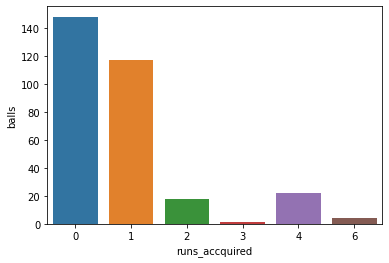

In [83]:
# Some Insight plot from the runs_accquired data
sns.countplot(x ='runs_accquired', data = match1_1st)
plt.ylabel('balls')
# Show the plot
plt.show()

Insights:
* Almost in 150 balls the batsman didn't take any run, either he defensed or didn't take any runs.
* The next highest is accquiring a 1 run, which is the safest way to score.
* Then the rarity increases from 4,2 followed by 6 and 3.
* Hitting a 6 is obviously very rare because it's risky.
* We can rarely observe 3 runs in a game

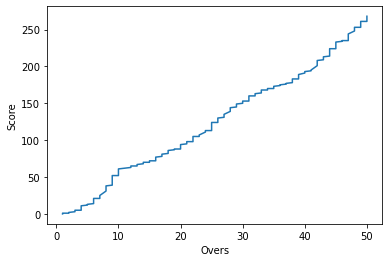

In [90]:
# Some Insight plot from the Score vs overs data
plt.plot(match1_1st.over,match1_1st.Score)
plt.xlabel('Overs')
plt.ylabel('Score')
plt.show()

Insights:
* In over 0-10 the score increased slight exponential pace
* In over 10-20 the score increased at a constant pace
* In over 30-40 the pace of the score was plateauing 
* In over 40-50 the score increased in a gradual pace

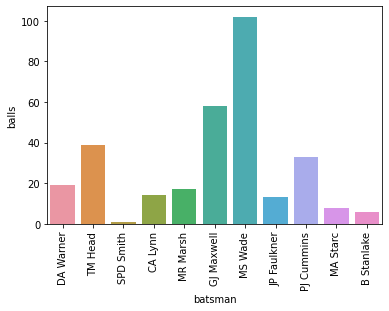

In [96]:
# Some Insight plot from the Batsmen data
sns.countplot(x ='batsman', data = match1_1st)
plt.ylabel('balls')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Insight:
* Here We can judge the performance of the Batmen of australia with their edurance/lifetime during their match
* MS Wade played 100 balls followed by GJ Maxwell(60 balls), DA Warmer( 20 balls)
* In this match SPD Smith showed poor even getting to bat just after the openning